In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('winequality-red.csv')
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [3]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
df.shape

(1599, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df["quality"].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

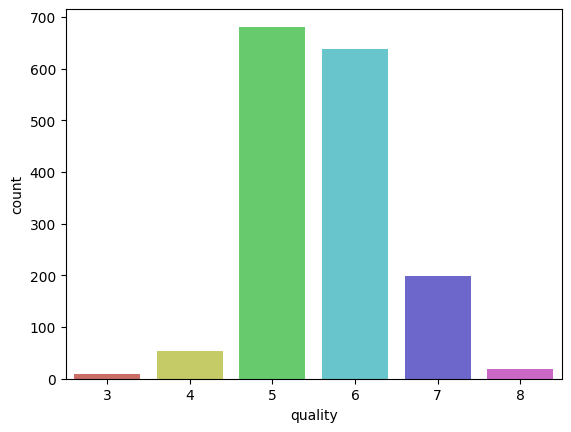

In [8]:
sns.countplot(x=df['quality'],palette= "hls")


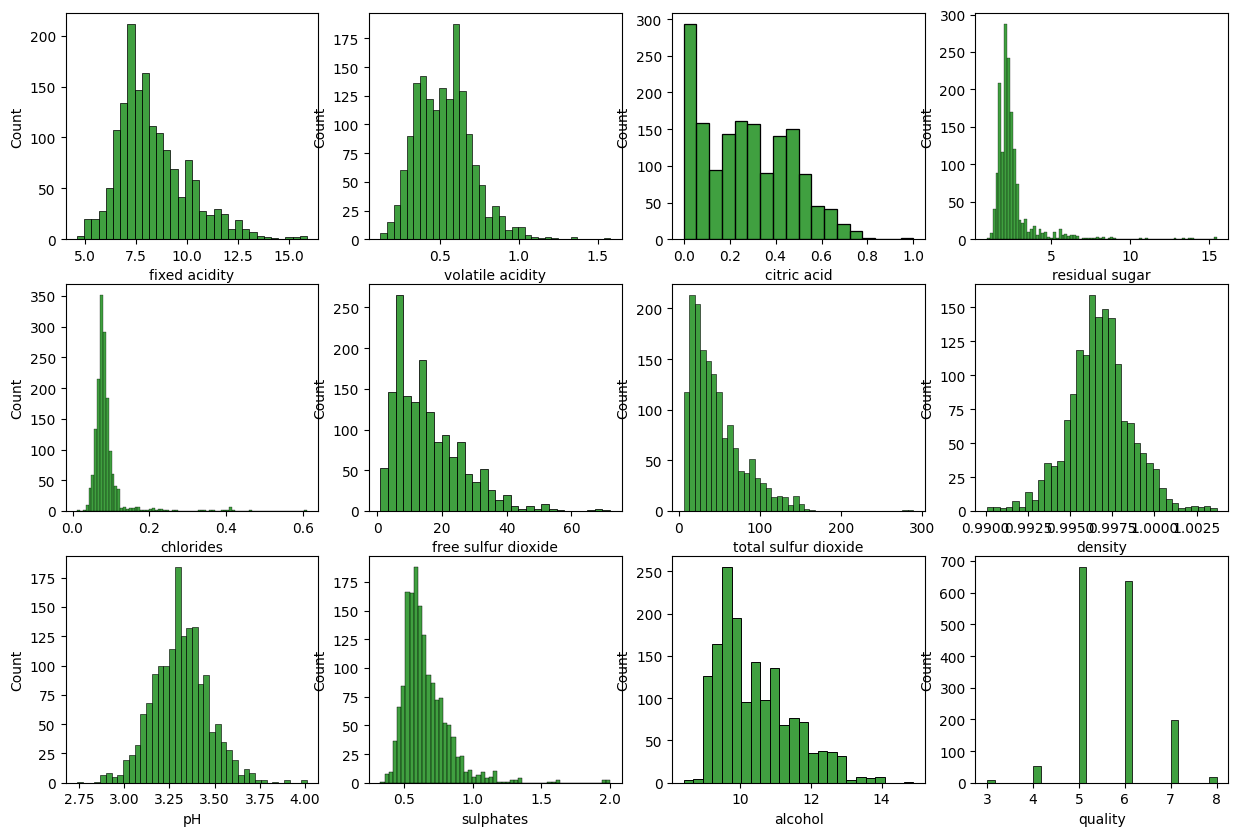

In [9]:
Num_fea=df.select_dtypes(exclude='object')
fig, axes=plt.subplots(nrows=3, ncols=4,figsize=(15,10))
k=0
for i in range(3):
    for j in range(4):
        sns.histplot(df[df.columns[k]],ax=axes[i][j],color='green')
        k+=1

plt.show()


In [10]:
df["residual sugar"]=np.log(df["residual sugar"])
df["chlorides"]=np.log(df["chlorides"])
df["free sulfur dioxide"]=np.log(df["free sulfur dioxide"])
df["total sulfur dioxide"]=np.log(df["total sulfur dioxide"])
df["sulphates"]=np.log(df["sulphates"])

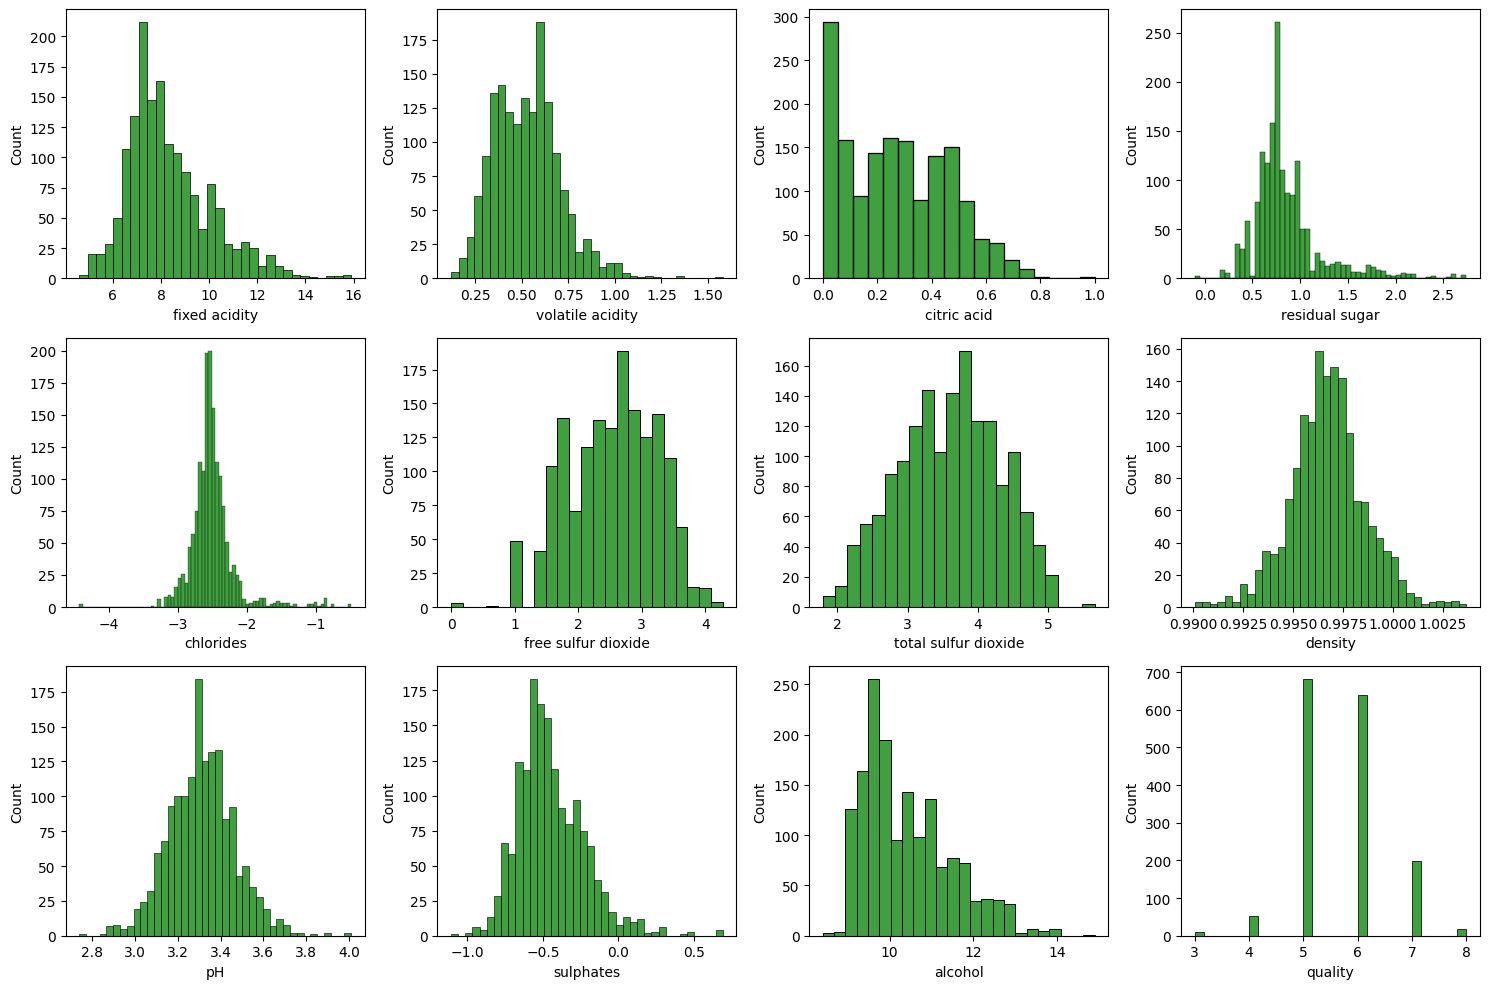

In [11]:
NUM_feat = df.select_dtypes(exclude='object')

fig, axes = plt.subplots(3, 4, figsize=(15,10))
axes = axes.flatten()

for i, col in enumerate(NUM_feat.columns):
    sns.histplot(NUM_feat[col], ax=axes[i], color='green')

# remove unused axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [12]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(240)

In [14]:
df=df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [15]:
x=df.drop("quality",axis="columns")
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,0.641854,-2.577022,2.397895,3.526361,0.9978,3.51,-0.579818,9.4
1,7.8,0.88,0.00,0.955511,-2.322788,3.218876,4.204693,0.9968,3.20,-0.385662,9.8
2,7.8,0.76,0.04,0.832909,-2.385967,2.708050,3.988984,0.9970,3.26,-0.430783,9.8
3,11.2,0.28,0.56,0.641854,-2.590267,2.833213,4.094345,0.9980,3.16,-0.544727,9.8
5,7.4,0.66,0.00,0.587787,-2.590267,2.564949,3.688879,0.9978,3.51,-0.579818,9.4


In [16]:
y=df["quality"]
y.head()

0    5
1    5
2    5
3    6
5    5
Name: quality, dtype: int64

In [17]:
y.value_counts()

quality
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64

In [18]:
from imblearn.over_sampling import SMOTE
x = x.fillna(0)
oversample = SMOTE(k_neighbors=4, random_state=42)
x,y = oversample.fit_resample(x,y)

In [19]:
y.value_counts()

quality
5    577
6    577
7    577
4    577
8    577
3    577
Name: count, dtype: int64

In [20]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,0.848276,-2.502853,2.547871,3.604522,0.996709,3.309787,-0.444642,10.432315,5.623252
std,1.736990,0.183031,0.195537,0.350004,0.336045,0.683899,0.711538,0.001869,0.155036,0.224199,1.082065,0.823578
min,4.600000,0.120000,0.000000,-0.105361,-4.422849,0.000000,1.791759,0.990070,2.740000,-1.108663,8.400000,3.000000
25%,7.100000,0.390000,0.090000,0.641854,-2.659260,1.945910,3.091042,0.995600,3.210000,-0.597837,9.500000,5.000000
50%,7.900000,0.520000,0.260000,0.788457,-2.538307,2.639057,3.637586,0.996700,3.310000,-0.478036,10.200000,6.000000
75%,9.200000,0.640000,0.430000,0.955511,-2.396896,3.044522,4.143135,0.997820,3.400000,-0.314711,11.100000,6.000000
max,15.900000,1.580000,1.000000,2.740840,-0.492658,4.276666,5.666427,1.003690,4.010000,0.693147,14.900000,8.000000


In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x)
x=scaler.transform(x)
x=pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.494473,0.428860,-1.253635,-0.662342,-0.208971,0.053311,0.263898,0.727325,1.123390,-0.608924,-1.145722
1,-0.260084,1.134130,-1.253635,0.223881,0.602587,1.271953,1.232080,0.198007,-0.879175,0.285870,-0.811566
2,-0.260084,0.663950,-1.059212,-0.122525,0.400910,0.513697,0.924200,0.303870,-0.491582,0.077926,-0.811566
3,1.732217,-1.216770,1.468287,-0.662342,-0.251252,0.699485,1.074581,0.833189,-1.137571,-0.447201,-0.811566
4,-0.494473,0.272134,-1.253635,-0.815106,-0.251252,0.301281,0.495861,0.727325,1.123390,-0.608924,-1.145722


In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [23]:
#  Apply LogRegression

from sklearn.linear_model import LogisticRegression
model_LogReg = LogisticRegression()
model_LogReg.fit(x_train,y_train)
LogReg_acc=round(model_LogReg.score(x_test, y_test)*100)
LogReg_acc

64

In [24]:
#  decission tree regression
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
from sklearn.metrics import r2_score
DTR_Accuracy=round(r2_score(y_test, model.predict(x_test)) * 100)
DTR_Accuracy

86

In [25]:
# support vector regression
from sklearn.svm import SVR
model = SVR()
model.fit(x_train, y_train)
from sklearn.metrics import r2_score
SVR_Accuracy=round(r2_score(y_test, model.predict(x_test)) * 100)
SVR_Accuracy

89

In [26]:
# random forese regressor with estimate
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor(n_estimators=10)
RF_model.fit(x_train, y_train)
from sklearn.metrics import r2_score
RFR_Accuracy=round(r2_score(y_test, RF_model.predict(x_test)) * 100)
RFR_Accuracy

92

In [27]:
# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(x_train)
X_test_poly = poly.transform(x_test)

# Train model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Prediction & Accuracy
y_pred = poly_model.predict(X_test_poly)
PR_Accuracy = round(r2_score(y_test, y_pred) * 100, 2)

PR_Accuracy


80.79

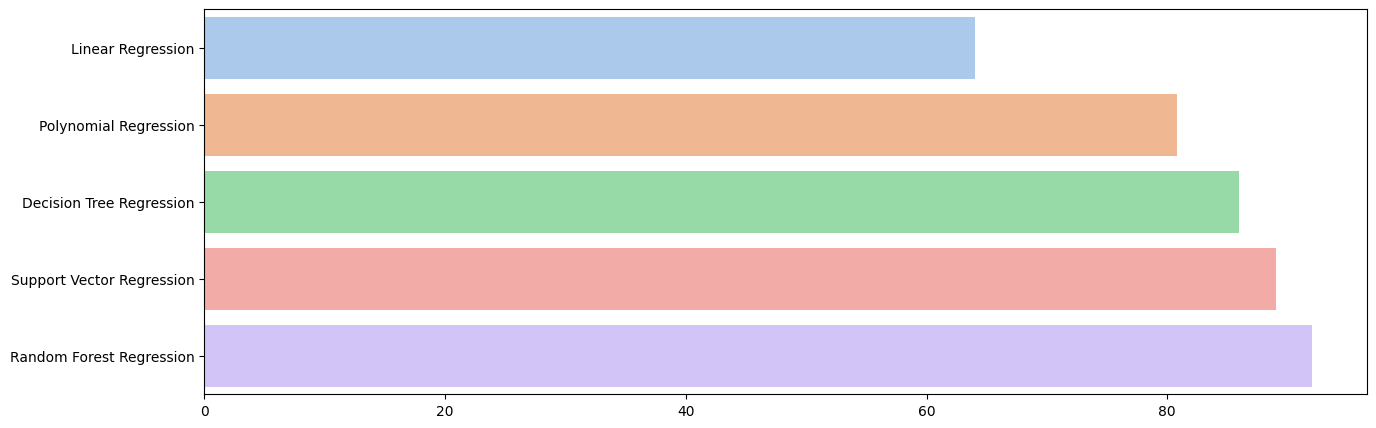

In [28]:
models = ["Linear Regression", "Polynomial Regression", "Decision Tree Regression", "Support Vector Regression", "Random Forest Regression"]
Accuracy = [LogReg_acc,PR_Accuracy, DTR_Accuracy, SVR_Accuracy, RFR_Accuracy]
plt.figure(figsize=(15, 5))
sns.barplot(x=Accuracy, y=models, palette='pastel')
plt.show()

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf_model= RandomForestClassifier()
rf_model.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


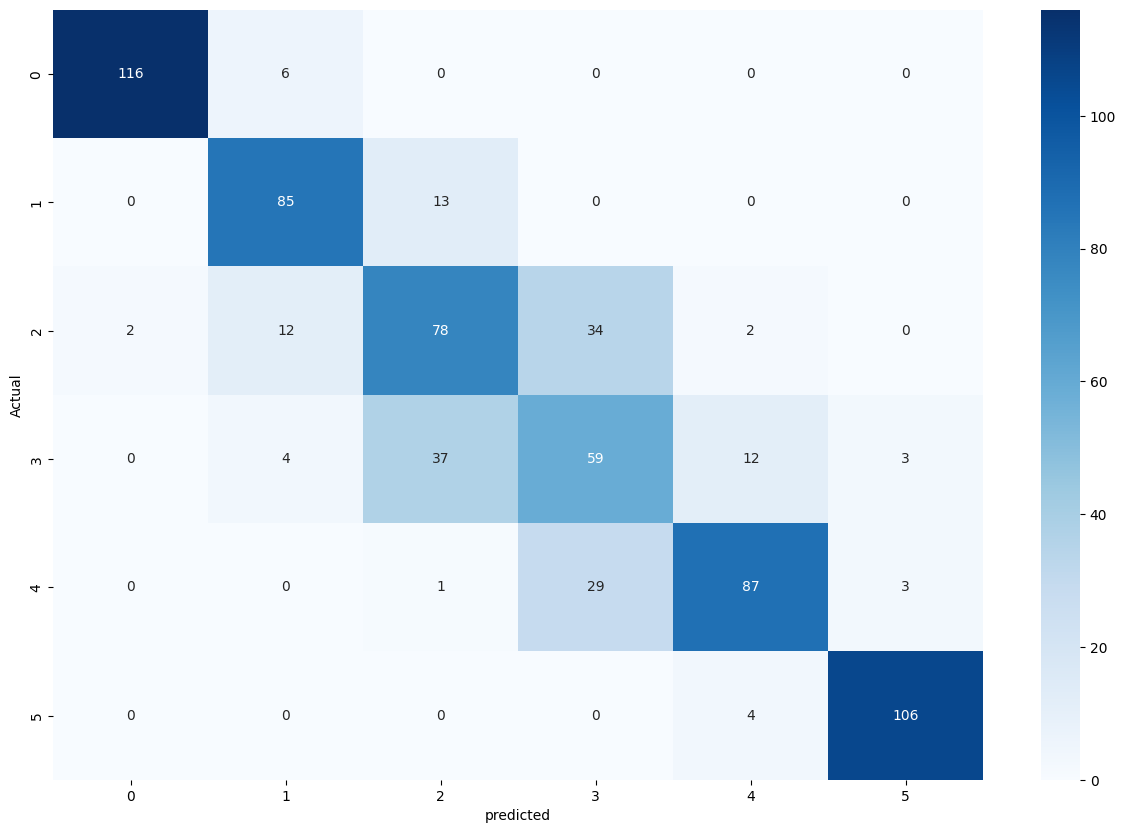

array([[116,   6,   0,   0,   0,   0],
       [  0,  85,  13,   0,   0,   0],
       [  2,  12,  78,  34,   2,   0],
       [  0,   4,  37,  59,  12,   3],
       [  0,   0,   1,  29,  87,   3],
       [  0,   0,   0,   0,   4, 106]])

In [30]:
# heatmap for confusion matrix (ensure cm exists and is 2-d)
from sklearn.metrics import confusion_matrix
import numpy as np

try:
    # check if cm is defined and 2_d
    if not ('cm' in globals() and hasattr(cm, "ndim") and cm.ndim == 2):
         raise NameError
except NameError:
    # round predictions to nearest integer since RF_model is a regressor
    cm = confusion_matrix(y_test, np.round(RF_model.predict(x_test)).astype(int))

plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.show()
cm

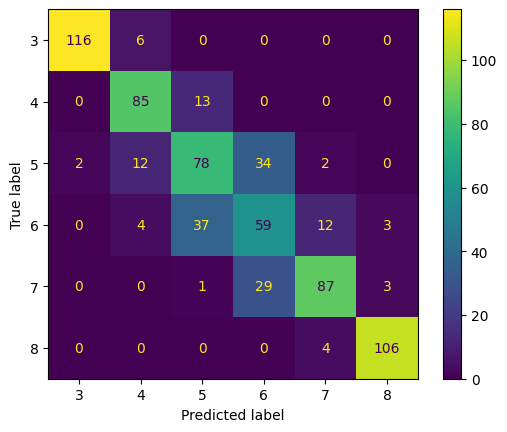

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=rf_model.classes_)
cm_display.plot()
plt.show()

In [32]:
feature_names = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
    'pH', 'sulphates', 'alcohol']
feature_values={
    'fixed acidity':7.4,
    'volatile acidity':0.70,
    'citric acid':0.00,
    'residual sugar':0.645738,
    'chlorides':0.9,
    'free sulfur dioxide':0.56,
    'total sulfur dioxide':98,
    'density':1,
    'pH':8,
    'sulphates':6.8,
    'alcohol':5.3
}

# create dataframe with user input 
user_input= pd.DataFrame([feature_values],columns=feature_names)

# scaler
user_input = scaler.transform(user_input)
# make the prediction 
prediction = rf_model.predict(user_input)

print("predicted value", prediction)

predicted value [5]


In [33]:
import pickle
filename = "scaler_model.sav"
pickle.dump(scaler, open(filename, 'wb'))

In [34]:
import pickle
filename = "finalized_model.sav"
pickle.dump(rf_model, open(filename, 'wb'))